In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
import os
# Folder Path
path = r"D:\MACHINE LEARNING\Mentorship program\NLP Projects\NLP_Project_second\job_postings"

In [4]:
# # Change the directory
# os.chdir(path)
# file_list=os.listdir()
# # file_list.remove('desktop.ini')

# # Read text File 
# def read_html_file(file_path):
#     with open(file_path, encoding='utf8') as f:
#         S = BeautifulSoup(f.read(), 'lxml')
#         print(S.prettify())
# #         print(S)
# #         print(S('title'))
# #         print(S.body.prettify())

# # iterate through all file
# counter=0
# for file in file_list:
#     print(file)
#     counter=counter+1
#     # Check whether file is in text format or not
#     if file.endswith(".html"):
#         file_path = f"{path}\{file}"
  
#         # call read text file function
#         read_html_file(file_path)
# print(counter)

In [5]:
lst=[]

os.chdir(path)
file_list=os.listdir()

def read_html_file(file_path):
    with open(file_path, encoding='utf8') as f:
        S = BeautifulSoup(f.read(), 'lxml')
        lst.append(S.find('body').text)

# iterate through all file
counter=0
for file in file_list:
#     print(file)
    counter=counter+1
    if file.endswith(".html"):
        file_path = f"{path}\{file}"
        read_html_file(file_path)
print(counter)

1458


In [6]:
lst1=[]

os.chdir(path)
file_list=os.listdir()

def read_html_file(file_path):
    with open(file_path, encoding='utf8') as f:
        S = BeautifulSoup(f.read(), 'lxml')
        lst1.append(S.find('title').contents)

# iterate through all file
counter=0
for file in file_list:
#     print(file)
    counter=counter+1
    if file.endswith(".html"):
        file_path = f"{path}\{file}"
        read_html_file(file_path)
print(counter)

1458


In [7]:
data1 = list(zip(file_list,lst1,lst))
df1 = pd.DataFrame(data1, columns = ['file_name','job_title','job_skills'])
df1


,file_name,job_title,job_skills
0,001b92395ed0fb62.html,"[Data Scientist - Beavercreek, OH]","Data Scientist - Beavercreek, OH\nData Scienti..."
1,00321a48d04fe754.html,"[Data Scientist - Seattle, WA 98101]","Data Scientist - Seattle, WA 98101\nAre you in..."
2,0079c11b2611349f.html,"[Data Scientist - Newark, CA]","Data Scientist - Newark, CA\nData Scientist\n\..."
3,007d9d7b5c09d820.html,[Patient Care Assistant / PCA - Med/Surg (Faye...,Patient Care Assistant / PCA - Med/Surg (Fayet...
4,00bf37ae19c7dfd7.html,"[Data Manager / Analyst - Oakland, CA]","Data Manager / Analyst - Oakland, CA\nHOW YOU ..."
...,...,...,...
1453,fee42538d4a7bb9a.html,"[Data Scientist - Glen Mills, PA]","Data Scientist - Glen Mills, PA\nSSRS Data Sci..."
1454,fefb9642ac28b85e.html,"[Data Analyst (Part-Time) - Austin, TX]","Data Analyst (Part-Time) - Austin, TX\nABOUT S..."
1455,ff0eb6d0b4da2289.html,[Manager - Business Development (Central and E...,Manager - Business Development (Central and Ea...
1456,ff81a90403a3f37e.html,[Natural Language Processing Undergraduate Int...,Natural Language Processing Undergraduate Inte...


In [8]:
lst2=[]
for i in range(len(df1)):
    strng = df1['job_title'][i][0].rpartition(' - ')
    lst2.append(strng[0]) 

In [9]:
df1['job_title']=lst2

In [10]:
# with pd.option_context('display.max_colwidth', None):
#   display(df1)

In [11]:
lst3=[]
for i in range(len(df1)):
    strng = ' '.join(df1['job_skills'][i].split())
    lst3.append(strng)    

In [12]:
df1['job_skills']=lst3

In [13]:
df1

,file_name,job_title,job_skills
0,001b92395ed0fb62.html,Data Scientist,"Data Scientist - Beavercreek, OH Data Scientis..."
1,00321a48d04fe754.html,Data Scientist,"Data Scientist - Seattle, WA 98101 Are you int..."
2,0079c11b2611349f.html,Data Scientist,"Data Scientist - Newark, CA Data Scientist New..."
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,Patient Care Assistant / PCA - Med/Surg (Fayet...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,"Data Manager / Analyst - Oakland, CA HOW YOU C..."
...,...,...,...
1453,fee42538d4a7bb9a.html,Data Scientist,"Data Scientist - Glen Mills, PA SSRS Data Scie..."
1454,fefb9642ac28b85e.html,Data Analyst (Part-Time),"Data Analyst (Part-Time) - Austin, TX ABOUT SO..."
1455,ff0eb6d0b4da2289.html,Manager - Business Development (Central and Ea...,Manager - Business Development (Central and Ea...
1456,ff81a90403a3f37e.html,Natural Language Processing Undergraduate Inte...,Natural Language Processing Undergraduate Inte...


In [14]:
df1['job_skills']=df1['job_skills'].str.lower()
df1['job_skills'].head()

0    data scientist - beavercreek, oh data scientis...
1    data scientist - seattle, wa 98101 are you int...
2    data scientist - newark, ca data scientist new...
3    patient care assistant / pca - med/surg (fayet...
4    data manager / analyst - oakland, ca how you c...
Name: job_skills, dtype: object

In [15]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub('[0-9]+', '',resumeText)  # remove numbers
    return resumeText

In [16]:
df1['job_skills'] = df1['job_skills'].apply(lambda x:cleanResume(x))
df1.head()

,file_name,job_title,job_skills
0,001b92395ed0fb62.html,Data Scientist,data scientist beavercreek oh data scientist p...
1,00321a48d04fe754.html,Data Scientist,data scientist seattle wa are you interested ...
2,0079c11b2611349f.html,Data Scientist,data scientist newark ca data scientist newark...
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,patient care assistant pca med surg fayette al...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,data manager analyst oakland ca how you can co...


In [17]:
# df1['job_skills']

In [18]:
import contractions
def expanded_text(sentence):
    return contractions.fix(sentence)
    
df1['job_skills']= df1['job_skills'].apply(expanded_text)
df1['job_skills'].head()

0    data scientist beavercreek oh data scientist p...
1    data scientist seattle wa  are you interested ...
2    data scientist newark ca data scientist newark...
3    patient care assistant pca med surg fayette al...
4    data manager analyst oakland ca how you can co...
Name: job_skills, dtype: object

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyambada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from nltk.tokenize import RegexpTokenizer 
def tokenize(sentence):
    return RegexpTokenizer(r'\w+').tokenize(sentence)
    
df1['job_skills']= df1['job_skills'].apply(tokenize)
df1['job_skills'].head()

0    [data, scientist, beavercreek, oh, data, scien...
1    [data, scientist, seattle, wa, are, you, inter...
2    [data, scientist, newark, ca, data, scientist,...
3    [patient, care, assistant, pca, med, surg, fay...
4    [data, manager, analyst, oakland, ca, how, you...
Name: job_skills, dtype: object

In [22]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Priyambada\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

df1['job_skills_lemmatized'] =df1['job_skills'].apply(lemmatize_text)
df1['job_skills_lemmatized'] =df1['job_skills_lemmatized'].apply(' '.join)
df1.head()

,file_name,job_title,job_skills,job_skills_lemmatized
0,001b92395ed0fb62.html,Data Scientist,"[data, scientist, beavercreek, oh, data, scien...",data scientist beavercreek oh data scientist p...
1,00321a48d04fe754.html,Data Scientist,"[data, scientist, seattle, wa, are, you, inter...",data scientist seattle wa are you interested i...
2,0079c11b2611349f.html,Data Scientist,"[data, scientist, newark, ca, data, scientist,...",data scientist newark ca data scientist newark...
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,"[patient, care, assistant, pca, med, surg, fay...",patient care assistant pca med surg fayette al...
4,00bf37ae19c7dfd7.html,Data Manager / Analyst,"[data, manager, analyst, oakland, ca, how, you...",data manager analyst oakland ca how you can co...


In [24]:
tfidf_model = TfidfVectorizer(max_df=1.0, max_features=200000,min_df=0.2, stop_words='english',
                                 use_idf=True)
tfidf_matrix = tfidf_model.fit_transform(df1['job_skills_lemmatized'])
tfidf_matrix = tfidf_matrix.toarray()

print ("In total, there are " + str(tfidf_matrix.shape[0]) + \
      " job postings and " + str(tfidf_matrix.shape[1]) + " terms.")

In total, there are 1458 job postings and 254 terms.


In [25]:
# tfidf_matrix

In [26]:
tf_selected_words = tfidf_model.get_feature_names()

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
df2 = pd.DataFrame(tfidf_matrix, columns=tfidf_model.get_feature_names())
df2

,ability,able,action,activity,advanced,age,algorithm,analysis,analyst,analytical,...,various,veteran,vision,visualization,way,work,working,world,written,year
0,0.000000,0.000000,0.063967,0.000000,0.058931,0.000000,0.124330,0.121926,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.066641,0.000000,0.065539,0.000000,0.052655,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.059860,0.000000,0.000000,0.082566,0.000000,0.058545,...,0.000000,0.000000,0.000000,0.067692,0.000000,0.033286,0.000000,0.053485,0.060873,0.000000
2,0.096979,0.150725,0.000000,0.000000,0.000000,0.000000,0.069419,0.000000,0.000000,0.000000,...,0.075189,0.000000,0.000000,0.000000,0.000000,0.073187,0.000000,0.000000,0.066921,0.040740
3,0.231589,0.119979,0.000000,0.127618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.128930,0.000000,0.000000,0.058258,0.075115,0.000000,0.000000,0.000000
4,0.000000,0.050276,0.000000,0.053477,0.000000,0.089917,0.000000,0.121109,0.053074,0.000000,...,0.000000,0.000000,0.162081,0.000000,0.049759,0.170887,0.125905,0.117679,0.000000,0.027179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0.000000,0.000000,0.000000,0.000000,0.141721,0.000000,0.074749,0.244347,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.240394,0.000000,0.078806,0.050805,0.000000,0.000000,0.087737
1454,0.033264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.186804,0.109152,0.132456,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.050206,0.064734,0.080673,0.045908,0.000000
1455,0.000000,0.000000,0.061206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.031355,0.000000,0.050382,0.000000,0.034909
1456,0.045188,0.000000,0.066568,0.000000,0.000000,0.062804,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.051702,0.000000,0.000000,0.000000,0.034102,0.131909,0.219184,0.000000,0.075933


In [28]:
# tfidf_model.get_params()

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
cos_matrix = cosine_similarity(tfidf_matrix)
cos_matrix1=cos_matrix.copy()
cos_df=pd.DataFrame(cos_matrix)
cos_df

,0,1,2,3,4,5,6,7,8,9,...,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457
0,1.000000,0.350866,0.330597,0.084464,0.145648,0.149286,0.211179,0.092358,0.262768,0.382419,...,0.184823,0.081583,0.390285,0.287838,0.215848,0.577716,0.405502,0.120430,0.298366,0.161404
1,0.350866,1.000000,0.350827,0.165189,0.168409,0.216689,0.332899,0.139042,0.323616,0.323216,...,0.251870,0.153868,0.466335,0.356249,0.306269,0.358278,0.569581,0.420394,0.299816,0.175549
2,0.330597,0.350827,1.000000,0.225840,0.215196,0.245979,0.372863,0.201627,0.410561,0.316003,...,0.307408,0.248531,0.267159,0.342851,0.153462,0.394571,0.370974,0.210138,0.254619,0.190979
3,0.084464,0.165189,0.225840,1.000000,0.244165,0.155101,0.118861,0.165985,0.156004,0.304296,...,0.091463,0.335470,0.142162,0.119140,0.206739,0.134069,0.192005,0.124724,0.127119,0.147087
4,0.145648,0.168409,0.215196,0.244165,1.000000,0.249970,0.262958,0.273109,0.283724,0.458134,...,0.176083,0.337473,0.364643,0.337117,0.468879,0.289825,0.271997,0.186116,0.305510,0.316470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0.577716,0.358278,0.394571,0.134069,0.289825,0.142834,0.234614,0.156876,0.371931,0.488666,...,0.186764,0.115008,0.451251,0.368485,0.451331,1.000000,0.460478,0.185976,0.257917,0.164274
1454,0.405502,0.569581,0.370974,0.192005,0.271997,0.256608,0.317978,0.215263,0.377160,0.455182,...,0.254191,0.257857,0.504046,0.373527,0.432428,0.460478,1.000000,0.499323,0.299067,0.238113
1455,0.120430,0.420394,0.210138,0.124724,0.186116,0.197897,0.299869,0.150589,0.328782,0.261887,...,0.126644,0.223515,0.281426,0.254034,0.327180,0.185976,0.499323,1.000000,0.185350,0.140232
1456,0.298366,0.299816,0.254619,0.127119,0.305510,0.290823,0.440809,0.327237,0.457015,0.238450,...,0.527515,0.196108,0.265726,0.257723,0.247423,0.257917,0.299067,0.185350,1.000000,0.144196


In [30]:
ind = np.diag_indices_from(cos_matrix)
cos_matrix[ind] = 0

In [31]:
def getscene(i):
    return df1[df1.index==i].index

In [32]:
# getscene(0)

In [33]:
def sortsim(i):
    similar=list(enumerate(cos_matrix[i]))
    return similar

In [34]:
similar_list=[]
disimilar_list=[]
for j in range(1458):
    for m in sortsim(j):
        t=m[0]
        if m[1]>0.7:
            similar_list.append(t)
        else:
            disimilar_list.append(t)       


In [35]:
sim_list=np.unique(similar_list)
# sim_list

In [36]:
df_similar=pd.DataFrame(sim_list,columns=['job_description'])
# df_similar

In [37]:
Filter_df  = df1.loc[ df1.index.intersection(sim_list) ]
df_cos=Filter_df .reset_index(drop=True)
df_cos

,file_name,job_title,job_skills,job_skills_lemmatized
0,001b92395ed0fb62.html,Data Scientist,"[data, scientist, beavercreek, oh, data, scien...",data scientist beavercreek oh data scientist p...
1,00321a48d04fe754.html,Data Scientist,"[data, scientist, seattle, wa, are, you, inter...",data scientist seattle wa are you interested i...
2,00bf37ae19c7dfd7.html,Data Manager / Analyst,"[data, manager, analyst, oakland, ca, how, you...",data manager analyst oakland ca how you can co...
3,0125eabc844281c9.html,Scientific Programmer,"[scientific, programmer, berkeley, ca, caribou...",scientific programmer berkeley ca caribou bios...
4,014ea972a4aa9812.html,Operations and Technology Summer 2020 Internsh...,"[operations, and, technology, summer, internsh...",operation and technology summer internship wes...
...,...,...,...,...
598,fc4bef82f5ea2f9a.html,Data Scientist (PhD) - Intern,"[data, scientist, phd, intern, spring, tx, job...",data scientist phd intern spring tx job summar...
599,fc6c6d5319262018.html,"Patient Care Assistant, Surgical (Gynecology/U...","[patient, care, assistant, surgical, gynecolog...",patient care assistant surgical gynecology uro...
600,fcc2e7e073797acc.html,Software Engineer - Mobile (Jr),"[software, engineer, mobile, jr, chantilly, va...",software engineer mobile jr chantilly va the s...
601,fd86dff3ba3f4abb.html,Natural Language Processing and Machine Learni...,"[natural, language, processing, and, machine, ...",natural language processing and machine learni...


In [38]:
vec= TfidfVectorizer(max_df=1.0, max_features=200000,min_df=0.2, stop_words='english',
                                 use_idf=True)
vec_matrix = vec.fit_transform(df_cos['job_skills_lemmatized'])
vec_matrix = vec_matrix.toarray()

In [39]:
# vec.get_feature_names()

In [40]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,random_state=42)
km.fit(vec_matrix)
clusters = km.labels_.tolist()

In [41]:
# len(clusters)

In [42]:
df_cos['cluster_labels']=km.labels_

In [43]:
df_cos

,file_name,job_title,job_skills,job_skills_lemmatized,cluster_labels
0,001b92395ed0fb62.html,Data Scientist,"[data, scientist, beavercreek, oh, data, scien...",data scientist beavercreek oh data scientist p...,0
1,00321a48d04fe754.html,Data Scientist,"[data, scientist, seattle, wa, are, you, inter...",data scientist seattle wa are you interested i...,0
2,00bf37ae19c7dfd7.html,Data Manager / Analyst,"[data, manager, analyst, oakland, ca, how, you...",data manager analyst oakland ca how you can co...,1
3,0125eabc844281c9.html,Scientific Programmer,"[scientific, programmer, berkeley, ca, caribou...",scientific programmer berkeley ca caribou bios...,2
4,014ea972a4aa9812.html,Operations and Technology Summer 2020 Internsh...,"[operations, and, technology, summer, internsh...",operation and technology summer internship wes...,1
...,...,...,...,...,...
598,fc4bef82f5ea2f9a.html,Data Scientist (PhD) - Intern,"[data, scientist, phd, intern, spring, tx, job...",data scientist phd intern spring tx job summar...,0
599,fc6c6d5319262018.html,"Patient Care Assistant, Surgical (Gynecology/U...","[patient, care, assistant, surgical, gynecolog...",patient care assistant surgical gynecology uro...,1
600,fcc2e7e073797acc.html,Software Engineer - Mobile (Jr),"[software, engineer, mobile, jr, chantilly, va...",software engineer mobile jr chantilly va the s...,2
601,fd86dff3ba3f4abb.html,Natural Language Processing and Machine Learni...,"[natural, language, processing, and, machine, ...",natural language processing and machine learni...,2


In [44]:
print ("Number of jobs included in each cluster:")
df_cos['cluster_labels'].value_counts().to_frame()

Number of jobs included in each cluster:


,cluster_labels
0,261
1,181
2,161


In [45]:
km.cluster_centers_.shape

(3, 289)

In [46]:
df_cos['cluster_name']=df_cos['cluster_labels']
cleanup_nums={0:'Data scientist', 1:'Misc jobs',2:'Machine learning engineer'}
df_cos['cluster_name'].replace(cleanup_nums, inplace=True)
df_cos

,file_name,job_title,job_skills,job_skills_lemmatized,cluster_labels,cluster_name
0,001b92395ed0fb62.html,Data Scientist,"[data, scientist, beavercreek, oh, data, scien...",data scientist beavercreek oh data scientist p...,0,Data scientist
1,00321a48d04fe754.html,Data Scientist,"[data, scientist, seattle, wa, are, you, inter...",data scientist seattle wa are you interested i...,0,Data scientist
2,00bf37ae19c7dfd7.html,Data Manager / Analyst,"[data, manager, analyst, oakland, ca, how, you...",data manager analyst oakland ca how you can co...,1,Misc jobs
3,0125eabc844281c9.html,Scientific Programmer,"[scientific, programmer, berkeley, ca, caribou...",scientific programmer berkeley ca caribou bios...,2,Machine learning engineer
4,014ea972a4aa9812.html,Operations and Technology Summer 2020 Internsh...,"[operations, and, technology, summer, internsh...",operation and technology summer internship wes...,1,Misc jobs
...,...,...,...,...,...,...
598,fc4bef82f5ea2f9a.html,Data Scientist (PhD) - Intern,"[data, scientist, phd, intern, spring, tx, job...",data scientist phd intern spring tx job summar...,0,Data scientist
599,fc6c6d5319262018.html,"Patient Care Assistant, Surgical (Gynecology/U...","[patient, care, assistant, surgical, gynecolog...",patient care assistant surgical gynecology uro...,1,Misc jobs
600,fcc2e7e073797acc.html,Software Engineer - Mobile (Jr),"[software, engineer, mobile, jr, chantilly, va...",software engineer mobile jr chantilly va the s...,2,Machine learning engineer
601,fd86dff3ba3f4abb.html,Natural Language Processing and Machine Learni...,"[natural, language, processing, and, machine, ...",natural language processing and machine learni...,2,Machine learning engineer


In [47]:
print ("<Document clustering result by K-means>")

# km.cluster_centers_ denotes the importances of each items in centroid.
# need to sort it in descending order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

Cluster_keywords_summary = []
for i in range(3):
    print ("Cluster " + str(i) + " words:") 
    for ind in order_centroids[i, :20]: # get the top 6 words of each cluster
        Cluster_keywords_summary.append(vec.get_feature_names()[ind])
        print (vec.get_feature_names()[ind] + ", ")

    cluster_jobs = df_cos[df_cos.cluster_labels == i]
    print ("Cluster " + str(i) + " titles (" + str(len(cluster_jobs)) + " jobs): ") 
    print()

<Document clustering result by K-means>
Cluster 0 words:
data, 
business, 
experience, 
analytics, 
learning, 
team, 
science, 
scientist, 
machine, 
analysis, 
model, 
product, 
statistical, 
insight, 
work, 
using, 
technique, 
solution, 
project, 
tool, 
Cluster 0 titles (261 jobs): 

Cluster 1 words:
work, 
health, 
service, 
project, 
data, 
experience, 
position, 
required, 
ability, 
research, 
financial, 
duty, 
management, 
education, 
program, 
information, 
job, 
skill, 
quality, 
department, 
Cluster 1 titles (181 jobs): 

Cluster 2 words:
software, 
learning, 
experience, 
research, 
language, 
intelligence, 
data, 
machine, 
product, 
team, 
engineer, 
work, 
development, 
processing, 
network, 
application, 
technology, 
engineering, 
analysis, 
security, 
Cluster 2 titles (161 jobs): 



C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def wordcloud(i):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,random_state=101).generate(" ".join(df_cos[df_cos['cluster_labels']==i]['job_skills_lemmatized']))
    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

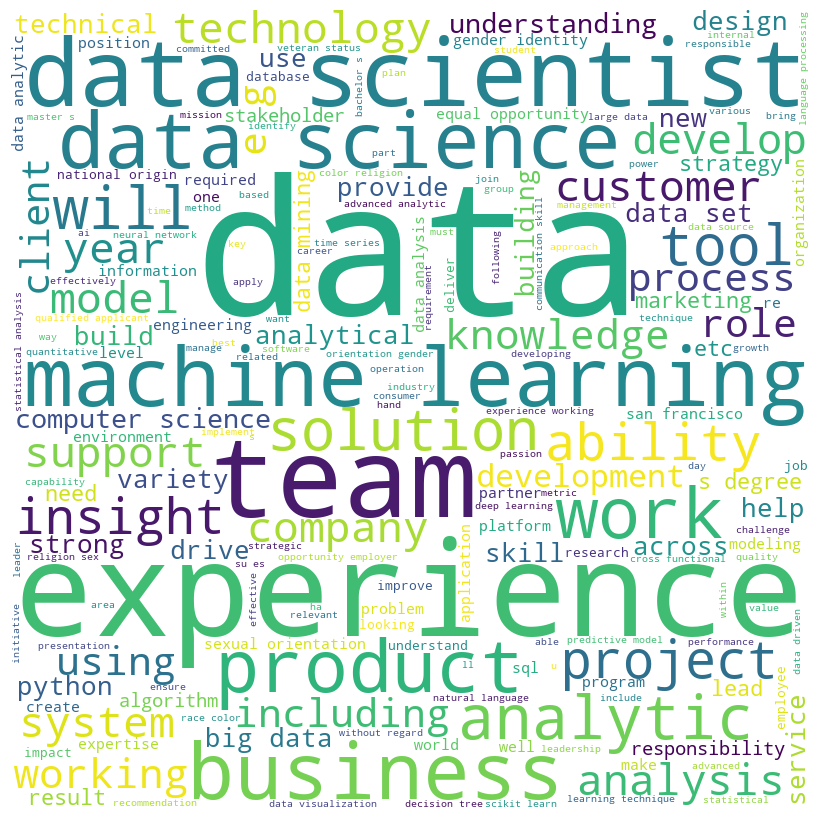

In [50]:
wordcloud(0)